# Titanic Survivors
___

## Data
The dataset contains data for the passengers who boarded the Titanic. The objective is to predict whether a passenger will survive or not survive the titanic tragedy using classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
titanic = pd.read_csv('data/train.csv', )
print(titanic.shape)
print(list(titanic.columns))

(891, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


The datasest includes 891 records/passengers and 12 fields.

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---

## Input variables
1. PassengerId (numeric): 
    * Count of passengers, incremental. Unique for each passenger, can be used as index.
2. Pclass (categorical):
    * Ticket class, a proxy for socio-economic status (SES):
        * 1 = 1st = Upper
        * 2 = 2nd = Middle
        * 3 = 3rd = Lower
3. Name:
    * Name of passenger, unique per passenger.
4. Sex (categorical):
    * male
    * female
5. Age (numeric)
6. SibSp (numeric):
    * Number of siblings/spouses, family relations aboard the Titanic.
        * Sibling = brother, sister, stepbrother, stepsister.
        * Spouse = husband, wife
            * Ignore = mistresses and fiances
7. Parch (numeric):
    * Number of parents/children, family relations aboard the Titanic.
        * Parent = mother, father
        * Child = daughter, son, stepdaughter, stepson
            * Children travelling with only a nanny = 0 for them.
8. Ticket:
    * Ticket number.
9. Fare (numeric):
    * Passenger fare.
10. Cabin:
    * Cabin number.
11. Embarked (categorical):
    * Port of Embarkation:
        * C = Cherbourg
        * Q = Queenstown
        * S = Southampton
        * nan = Unknown

## Predict variable (desired target)
* Survived (binary):
    * Whether passenger survived or not:
        * Yes = 1
        * No = 0

---

## Cleaning data

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic['Cabin'].fillna('unknown', inplace=True)
print('Replaced all missing values for cabin with "unknown" \n')
print(titanic.Cabin.unique())

Replaced all missing values for cabin with "unknown" 

['unknown' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78'
 'D33' 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26'
 'C110' 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7'
 'C49' 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87'
 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26'
 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124'
 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44'
 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20'
 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101'
 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48'
 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24'
 'C90' 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3'
 'D6' 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24'
 'C

In [6]:
titanic['Embarked'].fillna('unknown', inplace=True)
print('Replaced all missing values for embarked with "unknown" \n')
print(titanic.Embarked.unique())

Replaced all missing values for embarked with "unknown" 

['S' 'C' 'Q' 'unknown']


In [7]:
mean_age = titanic['Age'].mean()
titanic['Age'].fillna(mean_age, inplace=True)
print(f'Imputed all missing values for age with the mean average for age: {mean_age}')

Imputed all missing values for age with the mean average for age: 29.69911764705882


In [8]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
titanic.set_index('PassengerId', inplace=True)

In [10]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S


Made PassengerId as index.

---

## Data Exploration

In [11]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
sns.set()

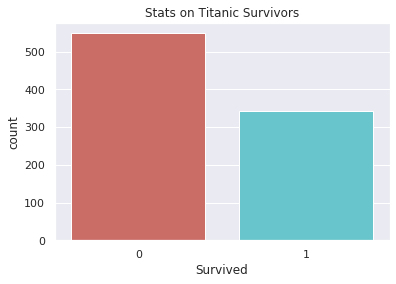

In [13]:
sns.countplot(x='Survived', data= titanic, palette= 'hls')
plt.title('Stats on Titanic Survivors')
plt.show()

In [14]:
surv_0 = len(titanic[titanic.Survived == 0])
surv_1 = len(titanic[titanic.Survived == 1])
print(f'Percentage of passengers who survived: %.2f' % (surv_1 / (surv_0 + surv_1) * 100))
print(f'Percentage of passengers who did not survived: %.2f' % (surv_0 / (surv_0 + surv_1) * 100))

Percentage of passengers who survived: 38.38
Percentage of passengers who did not survived: 61.62


Classes are not balanced, the ratio of non-survivors to survivors is 62:38

In [15]:
titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.415100,0.553734,0.329690,22.117887
1,1.950292,28.549778,0.473684,0.464912,48.395408


### Observations:
* The average ticket class (Pclass) for non-survivors is between the middle and upper class and for the survivors is between lower and middle class, closer to middle class.
* Average age of surviving passengers is lower than those who did not survive.
* On average those who paid more on fare price survived.

### Heatmap

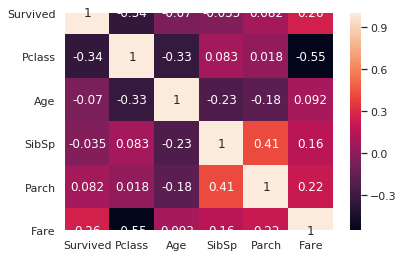

In [16]:
sns.heatmap(titanic.corr(), annot=True)
plt.show()

Parch and fare both have a positive correlation with survived:
* Parch = 0.08
* Fare = 0.26

---

## Dummy Variables
Creating dummy variables for all catergorical except for those that are already binary.

In [37]:
titanic_dummy = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
titanic_final = titanic[['Parch', 'Fare']].merge(titanic_dummy, on='PassengerId')
print('Created dummy variables for the Embarked column, stored the results to titanic_final along with the columns Fare and Parch')

Created dummy variables for the Embarked column, stored the results to titanic_final along with the columns Fare and Parch


In [38]:
titanic_final.head()

,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_unknown
PassengerId,,,,,,
1,0,7.2500,0,0,1,0
2,0,71.2833,1,0,0,0
3,0,7.9250,0,0,1,0
4,0,53.1000,0,0,1,0
5,0,8.0500,0,0,1,0
